In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib
import numpy as np

plt.rcParams['font.family'] = 'Times New Roman'

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'] ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


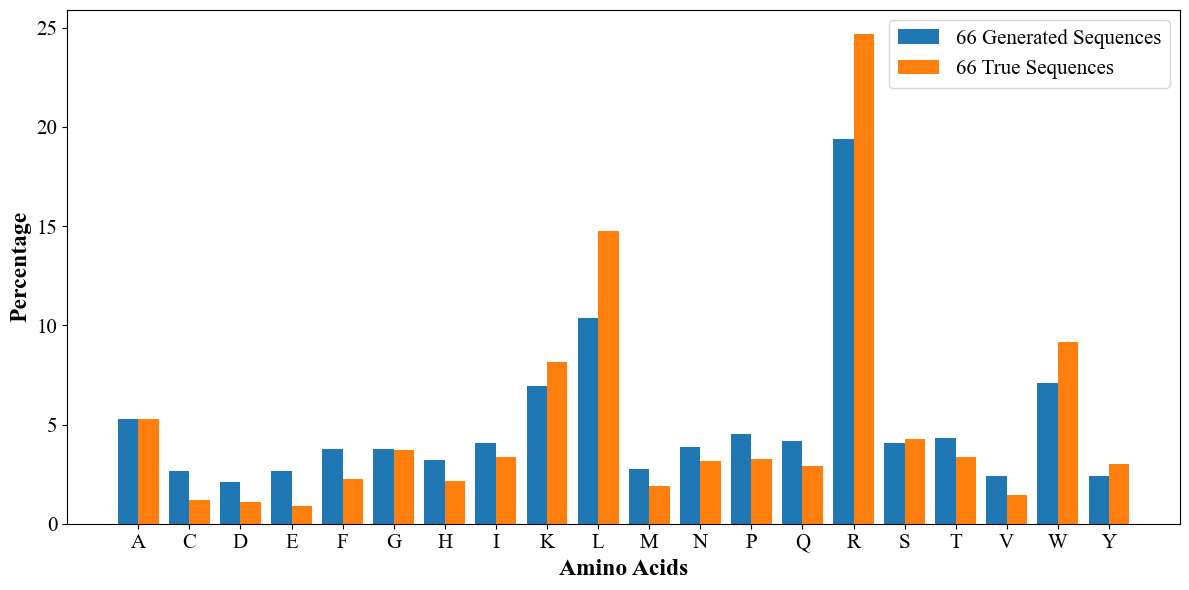

In [3]:
my_file = 'evaluate_generated_peptides.csv'

my_df = pd.read_csv(my_file)
my_df = my_df[my_df['CPPClassifier']==1]

generated_sequences = my_df['Generated Sequence'].unique().tolist()
true_sequences = my_df['True Sequence'].unique().tolist()

gene_amino_acids = ''.join(generated_sequences)
true_amino_acids = ''.join(true_sequences)

gene_amino_acid_counts = Counter(gene_amino_acids)
true_amino_acid_counts = Counter(true_amino_acids)

gene_amino_acid_df = pd.DataFrame.from_dict(gene_amino_acid_counts, orient='index', columns=['Count'])
gene_amino_acid_df['Proportion'] = gene_amino_acid_df['Count'] / gene_amino_acid_df['Count'].sum() * 100

true_amino_acid_df = pd.DataFrame.from_dict(true_amino_acid_counts, orient='index', columns=['Count'])
true_amino_acid_df['Proportion'] = true_amino_acid_df['Count'] / true_amino_acid_df['Count'].sum() * 100

gene_amino_acid_df = gene_amino_acid_df.sort_index()
true_amino_acid_df = true_amino_acid_df.sort_index()

print(gene_amino_acid_df.index.to_list(), true_amino_acid_df.index.to_list())


list1 = gene_amino_acid_df['Proportion'].to_list()  
list2 = true_amino_acid_df['Proportion'].to_list()  
length = len(list1)
x = np.arange(length)  
listDate = gene_amino_acid_df.index.to_list()

plt.figure(figsize=(12,6))
total_width, n = 0.8, 2   
width = total_width / n  
x1 = x - width / 2   
x2 = x1 + width  

plt.bar(x1, list1, width=width, label="66 Generated Sequences", color='#1F77B4')
plt.bar(x2, list2, width=width, label="66 True Sequences", color='#FF7F0E')
plt.xlabel("Amino Acids", fontsize=17, weight='bold')   
plt.ylabel("Percentage", fontsize=17, weight='bold')   
plt.xticks(x, listDate, fontsize=15)  
plt.yticks(fontsize=15)
plt.legend(fontsize=15)   
plt.tight_layout()

plt.savefig('Figure7_Composition.pdf', bbox_inches='tight',format='pdf',dpi=600)
plt.show()

# plt.figure(figsize=(10, 6))
# gene_amino_acid_df['Proportion'].plot(kind='bar')


# plt.title('Proportion of Amino Acids in Generated Sequences (69)', fontsize=15, weight='bold')
# plt.xlabel('Amino Acid', fontsize=15, weight='bold')
# plt.ylabel('Percentage', fontsize=15, weight='bold')
# plt.xticks(rotation=0, fontsize=12)
# plt.yticks(fontsize=12)
# # plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()